___Описание проекта___    
___Контекст___   
___Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.___    
___Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.___  

_Описание данных:_  
_Данные для первой части_  

_Файл /datasets/hypothesis.csv_  
  
_Hypothesis — краткое описание гипотезы;_  
_Reach — охват пользователей по 10-балльной шкале;_  
_Impact — влияние на пользователей по 10-балльной шкале;_  
_Confidence — уверенность в гипотезе по 10-балльной шкале;_  
_Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы._  


_Данные для второй части_ 

_Файл /datasets/orders.csv_ 

_transactionId — идентификатор заказа;_  
_visitorId — идентификатор пользователя, совершившего заказ;_  
_date — дата, когда был совершён заказ;_  
_revenue — выручка заказа;_  
_group — группа A/B-теста, в которую попал заказ._ 

_Файл /datasets/visitors.csv_  
_date — дата;_  
_group — группа A/B-теста;_  
_visitors — количество пользователей в указанную дату в указанной группе A/B-теста_  

___Часть 1. Приоритизация гипотез___    
___Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета___   
___Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета___    
___Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло___   

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('/datasets/hypothesis.csv')

In [3]:
data.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
data.columns = map(str.lower, data.columns)
pd.set_option('display.max_colwidth',0)
data

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


_В ходе подготовки данных к анализу, для удобства,я привела названия столбцов у датафрейма data к нижнему регистру_

In [6]:
data['ICE']=round(data['impact']*data['confidence']/data['efforts'],1)
data[['hypothesis','ICE']].sort_values(by='ICE',ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


In [7]:
data['RICE']=data['reach']*data['impact']*data['confidence']/data['efforts']
data[['hypothesis','RICE','ICE']].sort_values(by=['RICE','ICE'],ascending=False)

,hypothesis,RICE,ICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0,11.2
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0,7.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0,13.3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0,8.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0,1.1
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0,2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0,1.3
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0,1.0


__Вывод:Применив фреймворк ICE для проверки гипотез, наиболее перспективными показали себя 8,0,7,6 и 2 гипотезы. Затем , применив фреймворк RICE(который учитывает так же охват пользователей) вперед вышли те же 5 гипотез ,но наиболее перспективными оказались 7 и 2 гипотезы-судя по всему из-за того , что их охват пользователей больше , чем у других 3 лидирующих гипотез__

___Часть 2. Анализ A/B-теста___   
___Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.___  

In [8]:
import datetime as dt
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
register_matplotlib_converters()


In [9]:
orders=pd.read_csv('/datasets/orders.csv')
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [11]:
orders=orders.rename(columns={'transactionId':'transaction_id','visitorId':'visitor_id'})
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

orders.head(5)

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [12]:
orders.info()
orders['date'].min()
orders['date'].max()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


Timestamp('2019-08-31 00:00:00')

In [13]:
orders.duplicated().sum()

0

In [14]:
visitors=pd.read_csv('/datasets/visitors.csv')
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [15]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [16]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [17]:
visitors.info()
visitors['date'].min()
visitors['date'].max()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Timestamp('2019-08-31 00:00:00')

In [18]:
visitors.duplicated().sum()

0

_В ходе подготовки данных к анализу , привела столбцы date к типу datetime, названия колонок к нижнему регистру ,посмотрела минимальную и максимальную дату ,имеющуюся в данных . Пропусков и дупликатов в данных нет._  

In [19]:
unique_orders=orders[['visitor_id','transaction_id']].drop_duplicates()
unique_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1197 entries, 0 to 1196
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   visitor_id      1197 non-null   int64
 1   transaction_id  1197 non-null   int64
dtypes: int64(2)
memory usage: 28.1 KB


In [20]:
orders['visitor_id'].nunique()

1031

In [21]:
orders['transaction_id'].nunique()

1197

In [22]:
#считаем сколько уникальных пользователей присутствуют в обеих группах
orders.groupby('visitor_id').agg({'group':'nunique'}).query('group>1').count()


group    58
dtype: int64

In [23]:
#создаем список, в которую входят id пользователей , присутствующих в обеих группах
duplicated_users = orders.groupby('visitor_id').agg({'group' : 'nunique'}).reset_index().query('group>1')['visitor_id'].unique()
duplicated_users

array([   8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
       1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
       1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
       2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
       2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
       3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
       3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
       3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
       4186807279, 4256040402, 4266935830])

In [24]:
#удаляем из orders этих пользователей 
orders = orders.query('visitor_id not in @duplicated_users')
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1016 non-null   int64         
 1   visitor_id      1016 non-null   int64         
 2   date            1016 non-null   datetime64[ns]
 3   revenue         1016 non-null   int64         
 4   group           1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


___Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.___  

In [25]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

In [26]:
#Соберём агрегированные кумулятивные по дням данные о заказах и о посетителях
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [27]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [28]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845
...,...,...,...,...,...,...
57,2019-08-29,B,510,490,4746610,17708
58,2019-08-30,A,460,437,3311413,18037
59,2019-08-30,B,531,511,4955833,18198
60,2019-08-31,A,468,445,3364656,18736


Text(0, 0.5, 'Кумулятивная выручка')

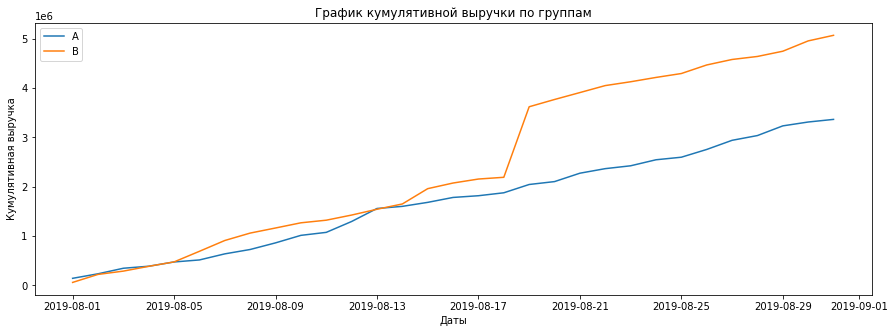

In [29]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15,5))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Даты')
plt.ylabel('Кумулятивная выручка')

__Вывод:По графику кумулятивной выручки по дням ,по группам , видно что лидирует группа В , а так же у нее есть резкий подъем в районе 18-19 августа. Возможно в эти даты был совершен необычно дорогой заказ__

___Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения___

Text(0, 0.5, 'Кумулятивный средний чек')

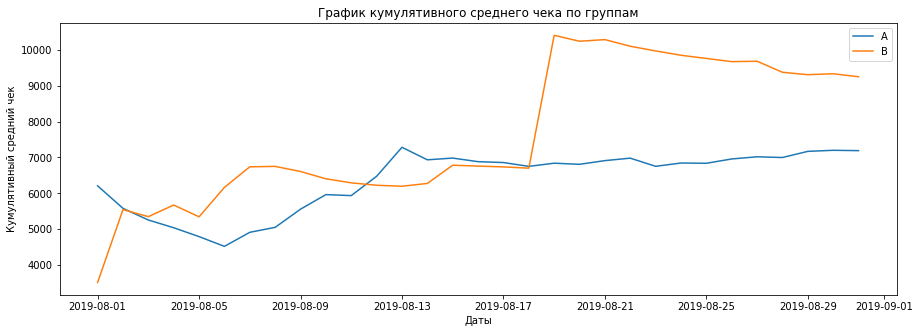

In [30]:
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Даты')
plt.ylabel('Кумулятивный средний чек')

__Вывод: По графику кумулятивного среднего чека по группам видно что большую часть времени так же лидирует группа В. Кроме периода примерно с 11.08 по 15.08 -здесь лидирует группа А. И так же виден сильный всплеск в районе 18-19 августа.Для интереса можно посмотреть на какие суммы были заказы в группе В в этот период__

In [31]:
orders.query('date=="2019-08-18" or date=="2019-08-19"').sort_values(by='revenue',ascending = False).head(5)


,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
530,3970235543,2912540959,2019-08-19,43990,A
527,1570513684,2837914161,2019-08-19,33405,B
421,3765974140,1357170471,2019-08-19,31680,A
461,2683113224,154576532,2019-08-19,26550,B


_Действительно . 19.08 был заказ №425 на сумму 1294500 руб . Из-за него-то и резкие подъемы на графике_

___Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения___

Text(0, 0.5, 'отношение среднего чека группы В к группе А')

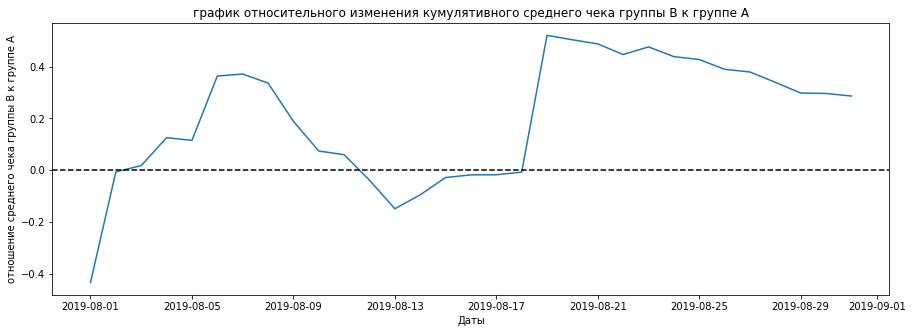

In [32]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,5))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('график относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Даты')
plt.ylabel('отношение среднего чека группы В к группе А')

__Вывод: по графику относительно изменения кумулятивного среднего чека группы В к группе А видно, что средний чек почти весь анализируемый период был больше кум. среднего чека группы А , кроме периода примерно с 11 по 15 марта__

___Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения___

Text(0, 0.5, 'среднее кол-во заказов на посетителя')

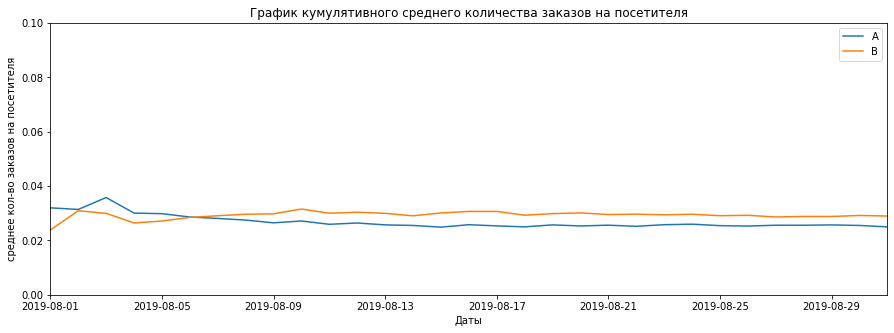

In [33]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(15,5))
# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis(["2019-08-01", '2019-08-31', 0, 0.1])
plt.title('График кумулятивного среднего количества заказов на посетителя')
plt.xlabel('Даты')
plt.ylabel('среднее кол-во заказов на посетителя')


__Вывод: по графику кумулятивного среднего кол-ва заказов на посетителя видно , что начиная примерно с 6.08 группа В стабильно лидирует__  

___Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения___

Text(0, 0.5, 'Относительный прирост')

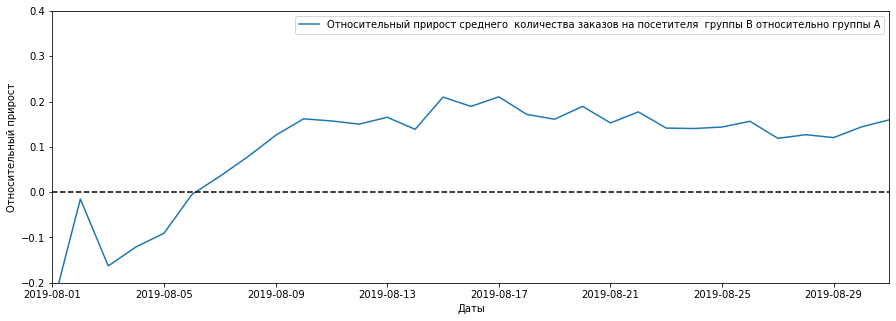

In [34]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост среднего  количества заказов на посетителя  группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.2, 0.4])
plt.xlabel('Даты')
plt.ylabel('Относительный прирост')

__Вывод: по графику относительного прироста среднего кол-ва заказов на посетителя группы В относительно группы А ,как и на предыдущем графике видно , что начиная с 6.08 группа В стабильно лидирует__  

___Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.___ 

In [35]:
#сгруппируем таблицу :кол-во заказов по пользователям 
orders_by_user=orders[['visitor_id','transaction_id']].groupby('visitor_id',as_index=False).agg({'transaction_id':'nunique'})
orders_by_user.columns=['user_id','orders']
orders_by_user.head(10)


,user_id,orders
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1
5,48147722,1
6,54447517,1
7,56960363,1
8,66685450,1
9,71018815,1


Text(0, 0.5, 'заказы')

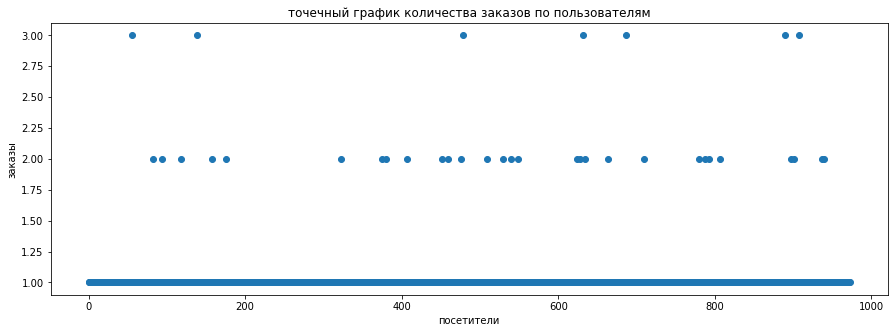

In [36]:
#зададим пременную x_values -столбец,содержащий последовательнось чисел от нуля до кол-ва строк в orders_by_user
x_values = pd.Series(range(0,len(orders_by_user)))
plt.figure(figsize=(15,5))
plt.scatter(x_values,orders_by_user['orders'])
plt.title('точечный график количества заказов по пользователям')
plt.xlabel('посетители')
plt.ylabel('заказы')


__Вывод: По точечному графику видно , что большинство пользователей сделали по 1 или 2 заказа.__

___Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.___

In [37]:
np.percentile(orders_by_user['orders'],[95,99])


array([1., 2.])

__Вывод: 95-ый перцентиль равен 2 , а 99-й равен 4. То есть не более 5 % пользователей сделали  2 заказа , и не более 1% пользователей сделали 4 заказа.Предварительно определим границу для аномальных пользователей-как сделавшие 2 заказа.__

___Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.___

Text(0, 0.5, 'стоимость заказа')

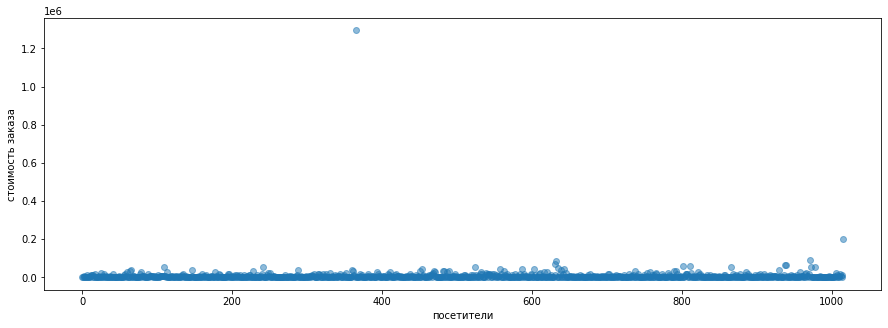

In [38]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,5))
plt.scatter(x_values, orders['revenue'],alpha=0.5)
orders['revenue'].median()
plt.xlabel('посетители')
plt.ylabel('стоимость заказа')

_Построим точечный график стоимостей заказов без выбросов_

Text(0, 0.5, 'стоимость заказа')

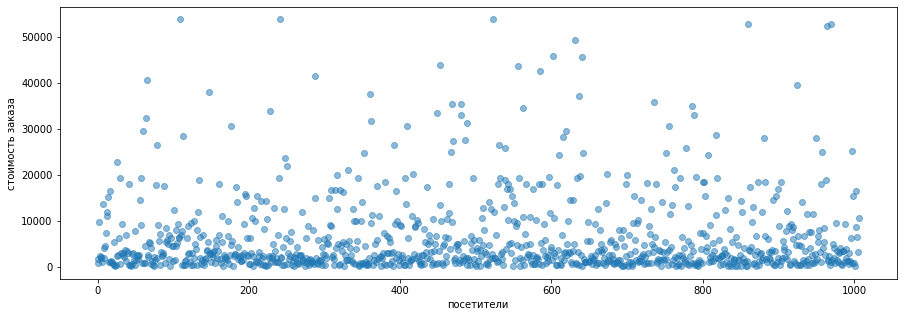

In [39]:
x_values = pd.Series(range(0,len(orders.query('revenue<=53904')['revenue']))) #сделали срез стоимостей заказов по 99-му перценилю
plt.figure(figsize=(15,5))
plt.scatter(x_values, orders.query('revenue<=53904')['revenue'],alpha=0.5)
plt.xlabel('посетители')
plt.ylabel('стоимость заказа')

__Вывод: по точечному графику стоимостей заказов(без выбросов) видно, что большинство заказов находятся до отметки примерно 30 тыс руб.Наибольшее кол-во заказов -до 10 тыс руб__

___Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.___

In [40]:
np.percentile(orders['revenue'],[95,99])

array([26785., 53904.])

__Вывод: 95-ый перцентиль =28000 руб-то есть такая стоимость и выше  не более чем у 5% заказов. 99-ый перцентиль равен 58233 тыс , то есть такая стоимость и выше не более чем у 1 % заказов__

In [41]:
np.percentile(orders['revenue'],[95,96,97,98,99])

array([26785., 30649., 34792., 42353., 53904.])

__Определим границу для аномальных поьзователей как сделавшие заказ на 42353 руб (98 перцентиль) и более__

___Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.___

In [42]:
visitors.head(), orders.head()

(        date group  visitors
 0 2019-08-01  A     719     
 1 2019-08-02  A     619     
 2 2019-08-03  A     507     
 3 2019-08-04  A     717     
 4 2019-08-05  A     756     ,
    transaction_id  visitor_id       date  revenue group
 0  3667963787      3312258926 2019-08-15  1650     B   
 1  2804400009      3642806036 2019-08-15  730      B   
 3  3797467345      1196621759 2019-08-15  9759     B   
 4  2282983706      2322279887 2019-08-15  2308     B   
 5  182168103       935554773  2019-08-15  2210     B   )

In [43]:
#найдем кол-во посетителей для группы А по датам 
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']] 
visitorsADaily.columns = ['date', 'visitorsPerDateA']

#для каждой даты,для группы А  найдем количество посетителей с накоплением 
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

#найдем кол-во посетителей для группы В по датам 
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

#для каждой даты,для группы B  найдем количество посетителей с накоплением 
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

# с таблицей заказов так же находим кол-во заказов и выручку по датам ,для каждой группы , и затем кол-во закаов 
# и выручку с накоплением по датам 
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]
#объединяем полученные таблицы в одну 
data_new = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data_new.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [44]:
#создадим переменные , в которых соберем кол-во заказов по пользователям , для каждой группы

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['user_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['user_id', 'orders'] 


___Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули___

In [45]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data_new['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data_new['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

___Применим критерий Манна Уитни для проверки гипотезы о наличии статистически значимых различий среднего числа заказов в группах. За нулевую гипотезу примем , что статистически значимых различий в числе заказов между группами нет , за альтернативную -что статистически значимые различия есть .Отформатируем p-value, округлив его до трёх знаков после запятой___  

___Напомним, что в sampleA сохранили выборку, где каждый элемент — число заказов определённого пользователя, в том числе ноль. Значит, число элементов sampleA — это количество пользователей, сумма всех элементов — количество заказов. Чтобы получить среднее число заказов на пользователя, поделим сумму заказов на число пользователей — найдём среднее в выборке sampleA методом mean(). Аналогично найдём среднее группы B: SampleB.mean()___  

___Выведем относительный прирост среднего числа заказов группы B: среднее число заказов группы B / среднее число заказов группы A - 1.  Округлим до трёх знаков после запятой___  


In [55]:
print('alpha=',0.05)
print("Значение p-value=""{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Отношение среднего числа заказов группы В к группе А=""{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

alpha= 0.05
Значение p-value=0.011
Отношение среднего числа заказов группы В к группе А=0.160


__Вывод: По «сырым» данным есть различия в среднем числе заказов групп A и B__   

__Первое число — p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет,отвергаем. Относительный выигрыш группы B в исследуемой выборке равен 16% — второе число в выводе__ 

___Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения___

_Применим критерий Манна Уитни для проверки гипотезы о наличии статистически значимых различий в среднем чеке между группами , за нулевую гипотезу примем -что различий в среднем чеке нет , за альтернативную -что различия есть_ 

In [56]:
print("Значение p-value="'{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("Отношение среднего чека группы В к группе А="'{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

Значение p-value=0.829
Отношение среднего чека группы В к группе А=0.287


__Вывод: p-value больше 0.05, следовательно, не можем отвергнуть нулевую гипотезу о том что различий в среднем чеке нет. Наблюдаемое превышение среднего чека группы В на 28,7% не является статистически значимым и получено случайно.__

___Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.___

_Для начала посмотрим , сколько заказов и пользователей у нас выпадет из анализа . Найдем и посчитаем пользователей , сделавших слишком дорогие заказы и слишком много заказов. Ранее мы посчитали с помощью метеда np.percentile что не более 5% пользователей совершили 2 и более заказов, и стоимость не более 5% заказов равна или дороже 28000руб и не более 1% заказов -дороже 58 233руб_  
_Посчиаем для ясности еще 96,97 и 98 перцентили , что бы определить верхнюю границу стоимости и количества заказов_

In [48]:
np.percentile(orders['revenue'],[96,97,98])

array([30649., 34792., 42353.])

In [49]:
np.percentile(orders_by_user['orders'],[96,97,98])

array([1., 2., 2.])

_Таким образом , возьмем за верхнюю границу количество заказов на пользователя -два , а сумму заказа -не более 42353 руб_

In [50]:
# находим и считаем пользователей с аномально большим кол-ом заказов и с аномально дорогими заказами

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['user_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['user_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 42353]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
33      249864742
684     358944393
648     382846391
58      611059232
dtype: int64
28


_Посчитаем различие кол-ва заказов без 28 "аномальных" пользователей_

In [51]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data_new['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data_new['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

_Применим статистический критерий Манна-Уитни к полученным выборкам. За нулевую гипотезу примем :различий в среднем количестве заказов на посетителя между группами нет, за альтернативную -различия в среднем количестве заказов есть_

In [57]:
print("Значение p-value="'{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Отношение кол-ва заказов на посетителя в группе В,относительно группы А="'{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

Значение p-value=0.004
Отношение кол-ва заказов на посетителя в группе В,относительно группы А=0.209


__Вывод: p_value намного меньше 0.05 , поэтому отвергаем нулевую гипотезу. Различия в среднем количестве заказов на посетителя между группами по "очищенным" данным есть. В исследуемой выборке в  группе B среднее  кол-во заказов больше на 20,9 %(по сырым данным группа В опережала на 16%)__

___Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения___

_Применим критерий Манна-Уитни к "очищенным данным": за нулевую гипотезу примем , что различий в среднем чеке нет , за альтернативную-что различия есть. А так же посчитаем отношение среднего чека группы В к среднему чеку из группы А_

In [59]:
print("Значение p-value="
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print("Отношение среднего чека группы В к среднему чеку группы А="
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

Значение p-value=0.858
Отношение среднего чека группы В к среднему чеку группы А=0.079


__Вывод: p_value намного больше 0.05-значит , мы не можем отказаться от нулевой гипотезы -то есть статистической значимости между средними чеками групп нет. А так же средний чек группы В в исследуемой выборке по очищенным данным теперь всего на 7,9 % больше чем в группе А(по сырым данным он был больше на 28,7%)__

___Примите решение по результатам теста и объясните его. Варианты решений:___  

___1. Остановить тест, зафиксировать победу одной из групп.___  
___2. Остановить тест, зафиксировать отсутствие различий между группами.___  
___3. Продолжить тест.___  

__Вывод:__  

__В ходе теста я выявила следующие факты:__  

__- Есть статистические значимые различия между группами  в среднем количестве заказов как по "сырым" данным,так и после фильтрации аномалий(в исследуемой выборке среднее количество заказов группы В по "сырым" даным больше на 16%,после "филтрации"-больше на 20,9%)__  

__-Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий(по сырым в исследуемой выборке данным разница среднего чека группы В к группе А составила 28,7%,после фильтрации аномалий-7,9%.Считаем ,что эта разница получена случайно и не является статистически значимой);__  

__Исходя из обнаруженных фактов,думаю, тест следует остановить и признать его успешным. Сегмент данных группы B лучше сегмента данных группы А__  